# Fundamentals of digital signal processing

## Chaper 1, What is a digital signal

A signal in the real world, an analog signal, is a continous function of time, something that has an instatanious value at certain
point in time. That could be the temprature of the surrounding air, the sound pressure at a given point i space, a stock market index or anything
that can be messured and changes in time. How can we represent such a signal in the digital domain? The answer is,
by taking samples of the signal at evenly spread points in time. How often we need to do that depends on nature of the signal we like tn sample,
how fast it changes. The rate at which we sample the signal is called the sample rate or sample frequency $f_s$, the unit is Hertz (Hz). The time interval between the samples are called the sample period $T$, the unit is seconds (s). The sample period $T$ is related to the sample rate $f_s$ as $$T=1/f_s$$.

So the digital signal is an array of sample where the values are the instataious values of the signal and the index $n$ of a sample
is related to time $$t=nT$$ The instantanious value is a function of time $$x(nT)$$ or of the sample index $$x(n)$$

### How to represent signals in Python with numpy and friends. 

In Python a signal is represented as an array of numbers. We will now create one period of the simplest possible signal, 
a sine wave.

First we import the numpy package and matplotlib so the signals can be plotted.

One period of a 1kHz sine wave have a duration of 0.001s or 1ms. At a sample rate of $f_s=48000$ sample per second or 48kHz that is 48 samples. We create  an array of 48 time points, $t$ where the sample period is $T=1/48000 = 20.833us$ (micro seconds). 

In [65]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

fs = 48000.0 # Sample rate
n = np.arange(48) # Array of sample indices [0, 1, 2, ..., 47]
T = 1.0/fs # sample period, the time between samples.
t = n * T  # Array of time points

### Creating and plotting a sine wave

Now we can create the sine wave signal x and plot it. To make the situation clear, the frequency $f$ is how many periods there are per second, $t$ is an array of times when we like to sample the signal. The period of the sine function is $2\pi$ so we must multiply the argument by that.
$$x(t)=sin(2\pi f t)$$ 
or
$$x(n)=sin(2\pi f n T)$$ 


The top panel is depicting the continous analog signal where the x-axis is yhe time in seconds while the bottom panel is depicting the descrete digital signal where the x-axis are sample index.

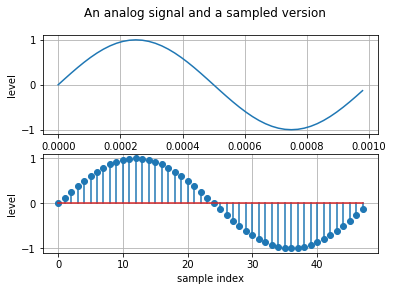

In [83]:
f = 1000.0 # frequency in Hz
x = np.sin(2.0*np.pi*f*t) 

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('An analog signal and a sampled version')
ax1.plot(t, x)

ax1.set(xlabel='time (s)', ylabel='level')
ax1.grid()
ax2.stem(n, x)

ax2.set(xlabel='sample index', ylabel='level')
ax2.grid()

## The Nyquist-Shannons sampling theorem.

The frequency range of a sampled signal is limited by the sample rate, it can only represent frequences lower then half the sample rate,
this frequency is known as Nyquists frequency after the Nyquist-Shannons sampling theorem.  The maximum bandwidth $B$ of a signal is related to the sample rate $f_s$ $$f_s=2B$$

To undestand why this is the case consider the following. Take a signal with a frequency greater than the Nyquist frequency, if $f_s=48kHz$ then $f_{ny}=24kHz$. We take a sine wave with a frequency of 44kHz and plot it aganst the original.

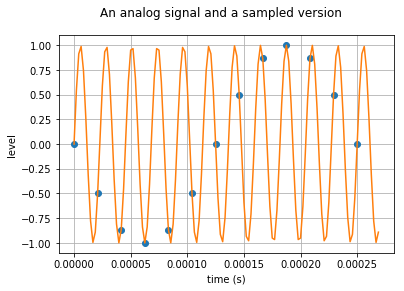

In [63]:
fs = 48000.0 # Sample rate
t = np.arange(0.0, 0.001, 1/fs) # Array of time points
n = np.arange(13) # Array of sample indices
m = np.arange(130) # Array of sample indices
T1 = 1 / fs
T2 = 1 / (10*fs)
t1 = n * T1
t2 = m * T2
f = 44000.0 # frequency in Hz
x1 = np.sin(2.0*np.pi*f*t1) 
x2 = np.sin(2.0*np.pi*f*t2) 

fig, ax1 = plt.subplots(1, 1)
fig.suptitle('An analog signal and a sampled version')
ax1.plot(t1, x1 , 'o')
ax1.plot(t2, x2)
ax1.set(xlabel='time (s)', ylabel='level')
ax1.grid()

What happend, the sampled signal is a sine wave but it has a much lower frequency $f_b=-4kHz$ then the original $f_a=44kHz$ and the phase is different. The frequency is actually $f_b=f_a-f_s$.  The frequency is negative, what does that mean. A signal with a negative frequency is just the negation of the positive signal $x=-y$.

Lets make another experiment. What happens if we have a signal that is higher then the sample rate, say 52kHz.

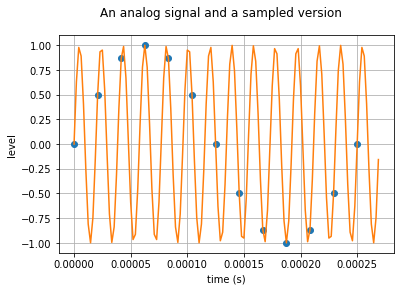

In [62]:
fs = 48000.0 # Sample rate
t = np.arange(0.0, 0.001, 1/fs) # Array of time points
n = np.arange(13) # Array of sample indices
m = np.arange(130) # Array of sample indices
T1 = 1 / fs
T2 = 1 / (10*fs)
t1 = n * T1
t2 = m * T2
f = 52000.0 # frequency in Hz
x1 = np.sin(2.0*np.pi*f*t1) 
x2 = np.sin(2.0*np.pi*f*t2) 

fig, ax1 = plt.subplots(1, 1)
fig.suptitle('An analog signal and a sampled version')
ax1.plot(t1, x1 , 'o')
ax1.plot(t2, x2)

ax1.set(xlabel='time (s)', ylabel='level')
ax1.grid()


We get the same frequency but the signal has the opposite phase. We can repeate this for even higher frequences and get a similare result. A 100kHz sine  will also result in a 4kHz signal, that is $f_b=f_a-2f_s=100000-96000=4000$.

The conclusion is that frequency domain of a digital signal is periodic with $f_s$ as the period. A frequency can alway be mapped to a frequency in another period by $f_b=f_a-nf_s$ where $n$ is an integer such as $0 <= f_b < f_s$. The first half of the frequency domain $0 <= f < f_{ny}$ is mirrored in $f_{ny}$ When the digital signal is converted back to an analog signal only the first half between zero and $f_{ny}$ is used.

Imagine we have a signal with $f_s=48kHz$ where the level goes from 1 at 0Hz to 0 at 24kHz, it will be mirrored in $f_{ny}$ so one period of the spectrom will look like the following.

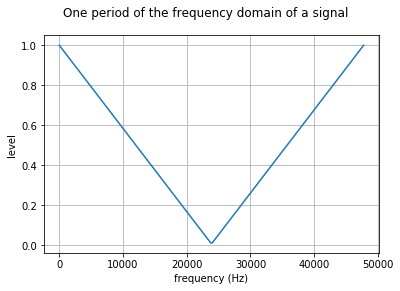

In [81]:
X = np.arange(1.0, 0.0, -0.01)
X = np.concatenate((X, X[::-1]))
f = np.arange(0, 48000. ,48000*0.005)

fig, ax1 = plt.subplots(1, 1)
fig.suptitle('One period of the frequency domain of a signal')
ax1.plot(f, X)

ax1.set(xlabel='frequency (Hz)', ylabel='level')
ax1.grid()

In the next chapter we will discuss how the digital signal can be reconstructed and converted to an analog signal.